
# 📈 Customer Churn — Business Analytics Report

## Executive Summary
This notebook provides a **business-facing analytics view** of customer churn using the cleaned dataset (`churn_clean.csv`).
It answers four executive questions:

1. What is our overall churn rate?
2. Which segments churn the most?
3. Where is revenue at risk?
4. What actions should the business take?

The analysis is designed for **Data Analyst** stakeholders and complements the ML system by translating data into decisions.


## Load Data

In [1]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/churn_clean.csv")

# Ensure churn is numeric 0/1
if df["Churn"].dtype == object:
    df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})

df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AvgCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,14.925000
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,53.985714
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,36.050000
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,40.016304
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,50.550000


## Core KPIs

In [2]:

total_customers = len(df)
churned = df["Churn"].sum()
churn_rate = churned / total_customers

monthly_revenue = df["MonthlyCharges"].sum()
revenue_at_risk = df.loc[df["Churn"] == 1, "MonthlyCharges"].sum()

kpis = pd.DataFrame({
    "Metric": ["Total Customers", "Churned Customers", "Churn Rate", "Monthly Revenue", "Revenue at Risk (Monthly)"],
    "Value": [total_customers, churned, round(churn_rate, 3), round(monthly_revenue, 2), round(revenue_at_risk, 2)]
})

kpis


,Metric,Value
0,Total Customers,7043.000
1,Churned Customers,1869.000
2,Churn Rate,0.265
3,Monthly Revenue,456116.600
4,Revenue at Risk (Monthly),139130.850


## Churn by Contract Type

In [3]:

contract_churn = df.groupby("Contract")["Churn"].mean().sort_values(ascending=False)
contract_churn


Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn, dtype: float64

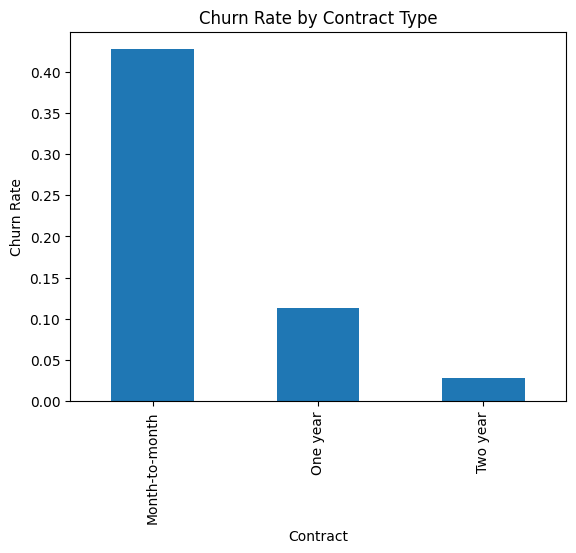

In [4]:

contract_churn.plot(kind="bar")
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.xlabel("Contract")
plt.show()


## Churn by Tenure Bucket

In [5]:

df["tenure_bucket"] = pd.cut(
    df["tenure"],
    bins=[0, 6, 12, 24, 48, 72],
    labels=["0-6", "7-12", "13-24", "25-48", "49+"]
)

tenure_churn = df.groupby("tenure_bucket")["Churn"].mean()
tenure_churn


C:\Users\USER\AppData\Local\Temp\ipykernel_5704\3087658363.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby("tenure_bucket")["Churn"].mean()


tenure_bucket
0-6      0.533333
7-12     0.358865
13-24    0.287109
25-48    0.203890
49+      0.095132
Name: Churn, dtype: float64

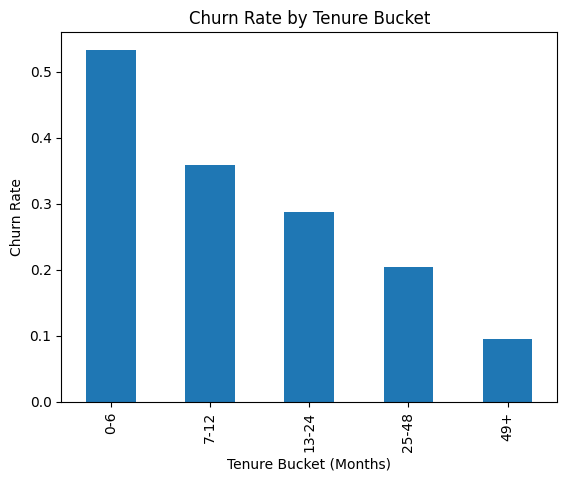

In [6]:

tenure_churn.plot(kind="bar")
plt.title("Churn Rate by Tenure Bucket")
plt.ylabel("Churn Rate")
plt.xlabel("Tenure Bucket (Months)")
plt.show()


## Churn by Payment Method

In [7]:

payment_churn = df.groupby("PaymentMethod")["Churn"].mean().sort_values(ascending=False)
payment_churn


PaymentMethod
Electronic check             0.452854
Mailed check                 0.191067
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Name: Churn, dtype: float64

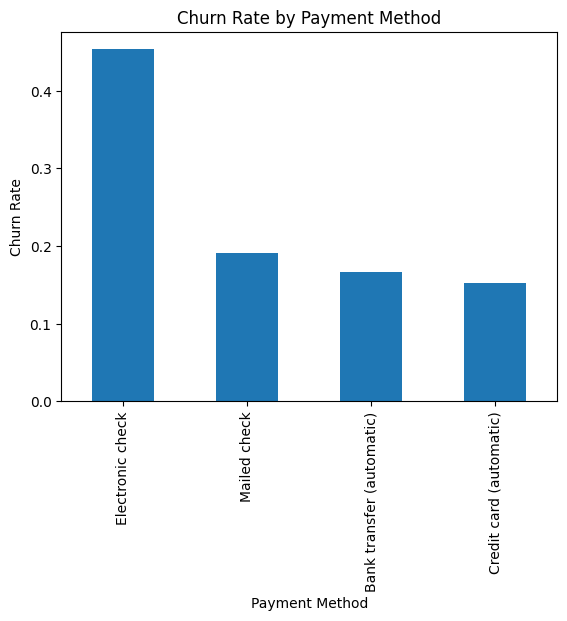

In [8]:

payment_churn.plot(kind="bar")
plt.title("Churn Rate by Payment Method")
plt.ylabel("Churn Rate")
plt.xlabel("Payment Method")
plt.show()


## Revenue at Risk by Segment

In [9]:

rev_by_contract = df[df["Churn"] == 1].groupby("Contract")["MonthlyCharges"].sum().sort_values(ascending=False)
rev_by_contract


Contract
Month-to-month    120847.10
One year           14118.45
Two year            4165.30
Name: MonthlyCharges, dtype: float64

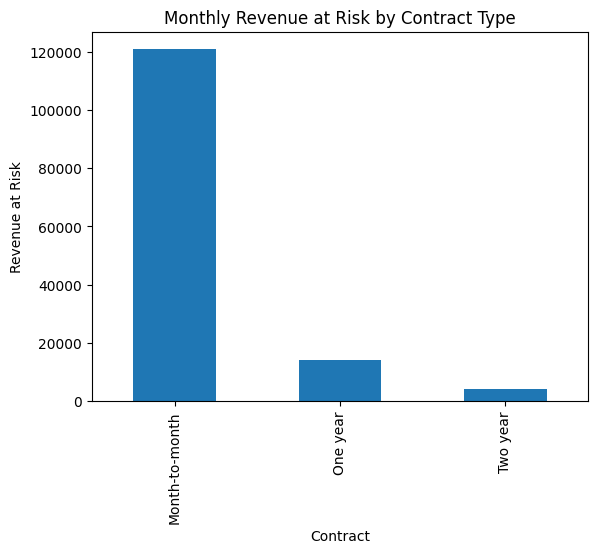

In [10]:

rev_by_contract.plot(kind="bar")
plt.title("Monthly Revenue at Risk by Contract Type")
plt.ylabel("Revenue at Risk")
plt.xlabel("Contract")
plt.show()



## Business Recommendations

- Prioritize **month-to-month** customers for retention campaigns.
- Focus on **early-tenure (0–6 months)** users with onboarding offers.
- Address high-risk **payment methods** with incentives or nudges.
- Allocate retention budget based on **revenue at risk** rather than raw churn count.

These actions directly align analytics with revenue protection.



## ML Integration Concept

This analytics layer can be extended by merging **model predictions**:

- Join churn probabilities to this dataset
- Rank customers by risk
- Create a *“Top 100 At-Risk Customers”* list for operations

This bridges **Analytics → ML → Business Action** in one system.
